In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon

# set the plot style to classic
# plt.style.use('classic')
# use latex for font rendering
plt.rcParams['text.usetex'] = True

allowed_color = 'Green'
polylog_color = 'Black'
noyhat_color = 'Orange'
giantstep_color = 'Blue'
notallowed_color = 'Red'
processnotdefined_color = 'Purple'
sweetspot_color = 'cyan'


## Time-Memory Phase diagram

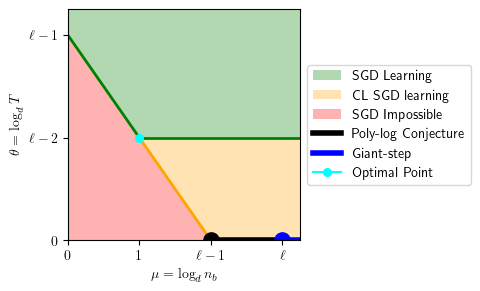

In [2]:
# log T -- log n_b
l = 3
margin = 0.25
linewidth = 2
markersize = 5.5
parametric_ticks = True

fig, ax = plt.subplots(figsize = (3,3))

ax.set_xlim(0., l+margin)
ax.set_ylim(0., l-1+margin)



## Regions
allowed_region = Polygon([[0,l-1], [1, l-2], [l+margin, l-2], [l+margin,l-1+margin], [0,l-1+margin]], facecolor = allowed_color, alpha = 0.3, label = 'SGD Learning')
ax.add_patch(allowed_region)
noyhat_region = Polygon([[1,l-2],[l-1,0],[l+margin,0],[l+margin,l-2]], facecolor = noyhat_color, alpha = 0.3, label = 'CL SGD learning')
ax.add_patch(noyhat_region)
notallowed_region = Polygon([[0,l-1],[0,0],[l-1,0]], facecolor = notallowed_color, alpha = 0.3, label = 'SGD Impossible')
ax.add_patch(notallowed_region)

## Lines
ax.plot([0,1], [l-1, l-2], color = allowed_color, linewidth = linewidth)
ax.plot([1,l+margin], [l-2,l-2], color = allowed_color, linewidth = linewidth)
ax.plot([1,l-1], [l-2,0], color = noyhat_color, linewidth = linewidth)
ax.plot([l-1,l],[0,0], color = polylog_color, linewidth = 2*linewidth, label = 'Poly-log Conjecture')
ax.plot([l,l+margin],[0,0], color = giantstep_color, linewidth = 2*linewidth, label = 'Giant-step')

## Points
ax.plot([1],[l-2], marker = 'o', color = sweetspot_color, markersize = markersize, label = 'Optimal Point')
ax.plot([l-1],[0], marker = 'o', color = polylog_color, markersize = 2*markersize)
ax.plot([l],[0], marker = 'o', color = giantstep_color, markersize = 2*markersize)


if l == 3 and parametric_ticks:
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels([r'$0$', '$1$', r'$\ell-1$', r'$\ell$'])
    ax.set_yticks([0,1,2])
    ax.set_yticklabels([r'$0$', r'$\ell-2$', r'$\ell-1$'])

ax.set_xlabel(r'$\mu = \log_d n_b$')
ax.set_ylabel(r'$\theta =\log_d T$')

plt.savefig('figures/logT_lognb[no_legend].pdf', bbox_inches = 'tight')

ax.legend(loc = 'center left', bbox_to_anchor = (1,0.5))

plt.savefig('figures/logT_lognb.pdf', bbox_inches = 'tight')
plt.show()

## Learning rate -- Batch size

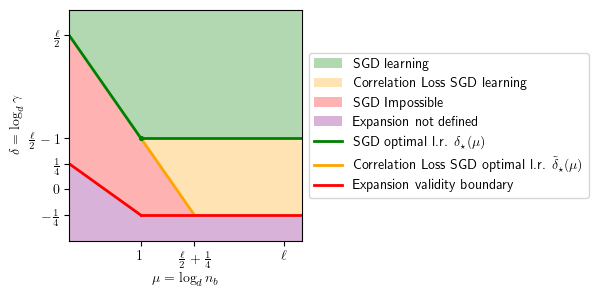

In [3]:
l = 3
margin = 0.25

fig, ax = plt.subplots(figsize = (3,3))

ax.set_xlim(0., l+margin)
ax.set_ylim(-1/4-margin, l/2+margin)

## Regions
allowed_region = Polygon([[0,l/2], [1, l/2-1], [l+margin, l/2-1], [l+margin,l/2+margin], [0,l/2+margin]], facecolor = allowed_color, alpha = 0.3, label = 'SGD learning')
ax.add_patch(allowed_region)
noyhat_region = Polygon([[1,l/2-1],[l/2+1/4,-1/4],[l+margin,-1/4],[l+margin,l/2-1]], facecolor = noyhat_color, alpha = 0.3, label = 'Correlation Loss SGD learning')
ax.add_patch(noyhat_region)
notallowed_region = Polygon([[0,l/2],[0,1/4],[1,-1/4],[l/2+1/4,-1/4]], facecolor = notallowed_color, alpha = 0.3, label = 'SGD Impossible')
ax.add_patch(notallowed_region)
theorynotdefined_region = Polygon([[0,1/4],[0,-1/4-margin],[l+margin,-1/4-margin],[l+margin,-1/4],[1,-1/4]], facecolor = processnotdefined_color, alpha = 0.3, label = 'Expansion not defined')
ax.add_patch(theorynotdefined_region)



## Lines
ax.plot([0,1], [l/2, l/2-1], color = allowed_color, linewidth = linewidth)
ax.plot([1,l+margin], [l/2-1,l/2-1], color = allowed_color, linewidth = linewidth, label = r'SGD optimal l.r. $\delta_\star(\mu)$')
ax.plot([1,l/2+1/4], [l/2-1,-1/4], color = noyhat_color, linewidth = linewidth, label = r'Correlation Loss SGD optimal l.r. $\tilde \delta_\star(\mu)$')
ax.plot([0,1], [1/4,-1/4], color=notallowed_color, linewidth = linewidth, label = 'Expansion validity boundary')
ax.plot([1,l+margin], [-1/4,-1/4], color=notallowed_color, linewidth = linewidth)

## Points
ax.plot([1],[l/2-1], marker = 'o', color = allowed_color, markersize = markersize/2)

if l == 3 and parametric_ticks:
    ax.set_xticks([1,3/2+1/4,3])
    ax.set_xticklabels(['$1$', r'$\frac{\ell}{2}+\frac14$', r'$\ell$'])
    ax.set_yticks([-1/4,0,1/4,3/2-1,3/2])
    ax.set_yticklabels([r'$-\frac14$','$0$',r'$\frac14$', r'$\frac{\ell}{2}-1$', r'$\frac{\ell}{2}$'])

ax.set_xlabel('$\mu = \log_d n_b$')
ax.set_ylabel('$\delta = \log_d \gamma$')

plt.savefig('figures/expansion_diagram[no_legend].pdf', bbox_inches = 'tight')
ax.legend(loc = 'center left', bbox_to_anchor = (1,0.5))

plt.savefig('figures/expansion_diagram.pdf', bbox_inches = 'tight')
plt.show()

## Exact asympotic limit

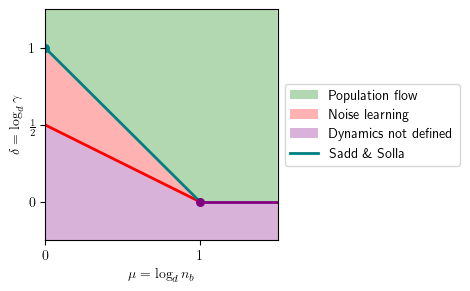

In [4]:
margin = 0.25

fig, ax = plt.subplots(figsize = (3,3))

ax.set_xlim(0., 1+2*margin)
ax.set_ylim(-margin, 1+margin)

## Regions
allowed_region = Polygon([[0,1], [1, 0], [1+2*margin, 0], [1+2*margin,1+margin], [0,1+margin]], facecolor = allowed_color, alpha = 0.3, label = 'Population flow')
ax.add_patch(allowed_region)
notallowed_region = Polygon([[0,1], [0,1/2], [1,0]], facecolor = notallowed_color, alpha = 0.3, label = 'Noise learning')
ax.add_patch(notallowed_region)
theorynotdefined_region = Polygon([[0,1/2],[0,-margin], [1+2*margin,-margin], [1+2*margin,0],[1,0]], facecolor = processnotdefined_color, alpha = 0.3, label = 'Dynamics not defined')
ax.add_patch(theorynotdefined_region)

## Lines
ax.plot([0,1], [1/2,0], color = notallowed_color, linewidth = linewidth)
ax.plot([0,1], [1, 0], color = 'Teal', linewidth = linewidth, label = 'Sadd \& Solla')
ax.plot([1,1+2*margin], [0,0], color = processnotdefined_color, linewidth = linewidth)

## Points
ax.plot([0],[1], marker = 'o', color = 'Teal', markersize = markersize)
ax.plot([1],[0], marker = 'o', color = processnotdefined_color, markersize = markersize, ls='')


ax.set_xticks([0,1])
ax.set_xticklabels(['$0$', '$1$'])
ax.set_yticks([0,1/2,1])
ax.set_yticklabels(['$0$',r'$\frac12$', '$1$'])


ax.set_xlabel('$\mu = \log_d n_b$')
ax.set_ylabel('$\delta = \log_d \gamma$')

plt.savefig('figures/exact_asymptotic_diagram[no_legend].pdf', bbox_inches = 'tight')
ax.legend(loc = 'center left', bbox_to_anchor = (1,0.5))

plt.savefig('figures/exact_asymptotic_diagram.pdf', bbox_inches = 'tight')
plt.show()